# **Proyecto de limpieza y transformacion de datos - Data Science Job Posting on Glassdoor**
# Descripción de los datos
Dataset acerca de ofertas de trabajo para Data Scientist obtenida de glassdoor, ideal para practicar limpieza y transformacion de datos
## Origen de los datos
Obtenido de kaggle, subido por Rashik Rahman. [Data Science Job Posting on Glassdoor](https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor?select=Uncleaned_DS_jobs.csv)




# Preguntas Orientadoras
### **Limpieza y Transformación de Datos**
1. **¿Cómo comprobar que el dataset solo contenga informacion de trabajos relacionados con datos?**
   - Filtrar solo los trabajos que tengan que ver con datos

2. **¿Cómo puedes extraer los valores de salario mínimo, máximo y si es un estimado de Glassdoor (Glassdoor est.) de la columna "Salary Estimate"?**
   - Separar los componentes de la columna "Salary Estimate" para tener acceso a salarios mínimos, máximos y la fuente del estimado.

3. **¿Cómo puedes eliminar los números del nombre de la empresa?**
   - Limpiar la columna "Company Name" eliminando los valores numéricos y saltos de linea

4. **¿Cómo eliminar los valores "-1" de la columna "Competitors" y convertirla en listas útiles?**
   - Limpiar y transformar la columna "Competitors" para su análisis.

5. **¿Cómo puedes estandarizar los datos de ingresos ("Revenue") para hacer análisis numéricos?**
   - Limpiar y transformar los datos de ingresos para que sean coherentes y comparables entre las empresas.

6. **¿Como limpiar todos los valores de "-1"?**
   - Limpiar todas columnas donde este presente "-1"
7. **¿Cómo podrías crear una nueva columna con el estado (o país) basado en la columna de ubicación ("Location")?**
    - Extraer el estado o país de la columna de ubicación para un análisis geográfico.
8. **¿Cómo saber la antiguedad de cada empresa?**
    - Extraer la edad de cada empresa a partir de la columna "Founded"
9. **¿Cómo extraer el nivel de experiencia del puesto de trabajo**
   - Extraer el nivel de expericien requerido para el trabajo(sr o jr)
10. **¿Qué información puedes extraer de las descripciones de puestos ("Job Description")?**
    - Extraer habilidades clave, tecnologías o requerimientos que puedan ser analizados en relación con el salario u otros atributos.

### **Análisis**
11. **¿Que habilidades y tecnologias son las mas demandas para puestos de data scientist?**
    - Analizar y visualizar que habilidades y tecnologias son las mas requeridas segun lo obtenido de la columna "Job Drescription"
12. **¿Existe relación entre los ratings de los puestos de trabajo puestos por los usuarios con el salario?**
    - Analizar y visualizar la relacion entre los ratings y salarios

# **Respuestas**
## **Limpieza y Transformacion de datos**

### **1 Tarea :**  Filtrar los componentes de la columna `Job Title` para obtener solo trabajos relacionados con datos.

Como primer paso, es necesario importar las librerías esenciales y cargar el dataset que contiene la información sin procesar sobre trabajos relacionados con Data Science.Se usará principalmente la librería `pandas` para manipular los datos y se configurará la opción de visualización para mostrar todas las columnas.
___

In [2]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
# Cargamos el dataset
df=pd.read_csv("data/glassdoor/Uncleaned_DS_jobs.csv")
# Configuramos pandas para mostrar todas las columnas en la salida
pd.set_option('display.max_columns', None)
# Mostramos las primeras filas del dataset para confirmar que se cargó correctamente
df_copy=df.copy() 
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


A partir de una exploracion inicial de los datos, se concluyo que era ideal filtrar los puestos de trabajo. Por lo que es necesario crear una función que filtre los trabajos relacionados con datos, la cual será reutilizada posteriormente en la novena tarea del proyecto. Para este proceso, se hará uso de la librería NLTK (Natural Language Toolkit), que es una herramienta ampliamente utilizada en el análisis y procesamiento del lenguaje natural (PLN)

Para este fin, se crearon dos funciones, una que verifica si una palabra o bigrama esta presente en el texto(`check_phrase_in_text`), en este caso, en la columna `Job Tittle` y otra que hace uso de las libreria NLTK para tokenizar, limpiar y lematizar el texto(`match_phrase`).


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
# Función para verificar si una frase (palabra o bigrama) está presente en el texto (descripción de trabajo/ job tittle)
def check_phrase_in_text(phrase, words):
    # Dividimos la frase en palabras
    words_1 = phrase.split()
    # Contamos cuántas palabras tiene la frase
    num_words = len(words_1)
    
    # Si la frase tiene solo una palabra
    if num_words == 1:
        # Retornamos 1 si la palabra está en la lista de palabras del texto, 0 si no está
        return 1 if phrase in words else 0
    # Si la frase tiene dos palabras (bigrama)
    elif num_words == 2:
        # Generamos bigramas (pares de palabras consecutivas) a partir del texto
        bigrams = set(ngrams(words, 2))
        # Convertimos los bigramas en frases unidas por un espacio
        bigram_phrases = [" ".join(bigram) for bigram in bigrams]
        # Retornamos 1 si el bigrama está en las frases, 0 si no está
        return 1 if phrase in bigram_phrases else 0
    else:
        # Si la frase tiene más de dos palabras, la función no la maneja y la omitimos
        pass

# Función para buscar si alguna frase de una lista aparece en la descripción del trabajo
def match_phrase(job_description, lista_phrase):
    # Tokenizamos la descripción del trabajo, convirtiendo el texto a minúsculas y separando en palabras
    tokens = word_tokenize(job_description.lower())
    # Eliminamos los caracteres que no son alfanuméricos (como signos de puntuación)
    tokens = [word for word in tokens if word.isalnum()]
    
    # Cargamos las palabras vacías en inglés para eliminarlas (como "the", "and", "of", etc.)
    stop_words = set(stopwords.words('english'))
    # Filtramos las palabras del texto, eliminando las palabras vacías
    words = [word for word in tokens if word not in stop_words]
    
    # Inicializamos el lematizador para reducir las palabras a su forma base (ej. "running" -> "run")
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Si la entrada es una lista de frases
    if isinstance(lista_phrase, list):
        # Iteramos sobre cada frase en la lista
        for phrase in lista_phrase:
            # Convertimos la frase a minúsculas y eliminamos espacios en blanco
            phrase = phrase.lower().strip()
            # Si encontramos una coincidencia, retornamos 1
            if check_phrase_in_text(phrase, words) == 1:
                return 1
        # Si ninguna frase de la lista coincide, retornamos 0
        return 0
    else: 
        # Si la entrada no es una lista, es una única frase
        lowered_phrase = lista_phrase.lower().strip()
        # Verificamos si la frase está en el texto y retornamos el resultado
        return check_phrase_in_text(lowered_phrase, words)


In [4]:
# Lista de palabras clave relacionadas con "Data"
lista_data = ["Data", "Data scientist", "Machine learning", "Business Intelligence", "Developer", "Software Engineer", "Software"]

# Aplicamos la función 'match_phrase' para verificar si el título del trabajo contiene alguna de las palabras clave de la lista
# La función 'match_phrase' se aplicará a cada título de trabajo en la columna "Job Title"
df_copy["True/False"] = df_copy["Job Title"].apply(lambda x: match_phrase(x, lista_data))

# Filtramos el dataframe para mantener solo los trabajos donde 'True/False' es 1 (coincidencia encontrada)
df_copy = df_copy.loc[df_copy["True/False"] == 1]

# Eliminamos la columna "True/False" ya que no es necesaria después del filtrado
df_copy.drop(columns=["True/False","Unnamed: 0"], inplace=True)

# Mostramos información del dataframe original y filtrado para comparar
print(df["Job Title"].info())  # Información del dataframe original
print(df_copy["Job Title"].info())  # Información del dataframe filtrado


<class 'pandas.core.series.Series'>
RangeIndex: 672 entries, 0 to 671
Series name: Job Title
Non-Null Count  Dtype 
--------------  ----- 
672 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB
None
<class 'pandas.core.series.Series'>
Index: 616 entries, 0 to 671
Series name: Job Title
Non-Null Count  Dtype 
--------------  ----- 
616 non-null    object
dtypes: object(1)
memory usage: 9.6+ KB
None


Se eliminaron 56 entradas con puestos de trabajo no relacionados a los datos. 

### **2 Tarea :**  Separar los componentes de la columna `Salary Estimate`

El objetivo de esta tarea es extraer los componentes del salario de la columna Salary Estimate. Esto nos permitirá obtener los siguientes valores de cada registro:

* **Salario mínimo:** La cantidad más baja del rango estimado.
* **Salario máximo:** La cantidad más alta del rango estimado.
* **Salario promedio:** El promedio entre el salario mínimo y el salario máximo.
* **Tipo de estimado:** Si el salario es estimado por Glassdoor

Para realizar esta separación, se creará una función que divida la cadena de texto en las partes correspondientes(`extract_salaries`). El resultado se almacenará en nuevas columnas para su posterior análisis.

#### **Proceso:**
1. Se crea una función `extract_salaries` que:
   - Divide la cadena de texto en la columna `Salary Estimate` en partes utilizando el carácter "K" como delimitador.
   - Extrae el salario mínimo, máximo y el tipo de estimado (si está disponible).
2. La función devuelve:
   - Un rango de salario en formato `min_salary-max_salary`.
   - El salario promedio calculado como el promedio de los salarios mínimo y máximo.
   - La fuente del estimado (si está presente).
3. Se aplica esta función a la columna `Salary Estimate` y se separan los valores en nuevas columnas.

___



In [5]:

print("Before:\n",df["Salary Estimate"][:5])
      
# Definimos una función para extraer los componentes del salario de la columna "Salary Estimate"
      
def extract_salaries(salary_str):
    try:
        # Dividimos el string por "K" (miles) para separar el salario mínimo y máximo
        parts = salary_str.split("K")

        # Extraemos el salario estimado completo (mínimo y máximo) con formato adecuado
        salary_estimate = parts[0][1:] + "-" + parts[1][2:]

        # Convertimos las partes a enteros para obtener los salarios mínimos y máximos
        min_salary = int(parts[0][1:])  # Extraemos el salario mínimo (descontando el símbolo "$")
        max_salary = int(parts[1][2:])  # Extraemos el salario máximo (descontando el símbolo "$")

        # Calculamos el salario promedio entre el mínimo y máximo
        avg_salary = int(np.mean([min_salary, max_salary]))

        # Extraemos el tipo de estimación (si existe) de la tercera parte del string
        estimate_type = parts[2][2:-1] if len(parts) > 2 else None  # Verificamos si existe un tipo de estimación

        # Retornamos los valores extraídos: estimado completo, salario promedio, salario mínimo, salario máximo y tipo de estimación
        return salary_estimate, avg_salary, min_salary, max_salary, estimate_type
    except Exception as e:
        # En caso de error, devolvemos valores nulos
        return None, None, None, None, None

# Aplicamos la función "extract_salaries" a cada valor de la columna "Salary Estimate" y creamos nuevas columnas
df_copy[["Salary Estimate", "Mean_Salary_Estimate", "Min_Salary_Estimate", "Max_Salary_Estimate", "Estimate_Type"]] = df_copy["Salary Estimate"].apply(
    lambda x: pd.Series(extract_salaries(x))
)
print("After:\n",df_copy["Salary Estimate"][:5])

Before:
 0    $137K-$171K (Glassdoor est.)
1    $137K-$171K (Glassdoor est.)
2    $137K-$171K (Glassdoor est.)
3    $137K-$171K (Glassdoor est.)
4    $137K-$171K (Glassdoor est.)
Name: Salary Estimate, dtype: object
After:
 0    137-171
1    137-171
2    137-171
3    137-171
4    137-171
Name: Salary Estimate, dtype: object


### **3. Tarea: Limpiar la columna `Company Name` eliminando los valores numéricos y saltos de línea**

Se debe limpiar la columna `Company Name` para eliminar cualquier valor numérico al final del nombre de la empresa, así como los saltos de línea y otros caracteres no deseados. Esto garantiza que los nombres de las empresas sean consistentes y limpios para su posterior análisis.

#### **Proceso:**
1. Se define una función `convert` que verifica si el nombre de la empresa tiene números al final o contiene saltos de línea.
2. Si se encuentra un número al final del nombre, se elimina.
3. Si se detectan saltos de línea, se eliminan.
4. Se aplica esta función a toda la columna `Company Name`.

---


In [6]:
# Mostrar valores únicos de la columna "Company Name" antes de realizar la conversión
print("Before : \n",df_copy["Company Name"][:10])

# Definir la función "convert" que eliminará los números al final de los nombres de las empresas
def convert(company_name):
    try:
        # Verificar si el último carácter del nombre de la empresa es un número
        if company_name[-1].isdigit():
            # Buscar la posición del salto de línea, si existe
            f = company_name.find("\n")
            r=company_name.find("\r")
            if f > 0:
                # Si se encuentra un salto de línea, cortar el nombre de la empresa hasta esa posición
                new_company_name = company_name[:f]
            # Devolver el nombre de la empresa sin el número al final
            if r > 0:
                new_company_name = company_name[:r]
            return new_company_name.rstrip('0123456789') # Eliminar cualquier número al final
        else:
            # Si el último carácter no es un número, devolver el nombre tal como está
            return company_name
    except:
        # Si ocurre algún error, devolver el nombre de la empresa original
        return company_name

# Aplicar la función "convert" a la columna "Company Name" para procesar todos los nombres de empresas
df_copy["Company Name"] = df_copy["Company Name"].apply(lambda x: convert(x))

# Mostrar los valores únicos de la columna "Company Name" después de realizar la conversión
print("After : \n",df_copy["Company Name"][:10])


Before : 
 0           Healthfirst\r\n3.1
1               ManTech\r\n4.2
2        Analysis Group\r\n3.8
3               INFICON\r\n3.5
4    Affinity Solutions\r\n2.9
5           HG Insights\r\n4.2
6              Novartis\r\n3.9
7                iRobot\r\n3.5
8         Intuit - Data\r\n4.4
9    XSELL Technologies\r\n3.6
Name: Company Name, dtype: object
After : 
 0           Healthfirst
1               ManTech
2        Analysis Group
3               INFICON
4    Affinity Solutions
5           HG Insights
6              Novartis
7                iRobot
8         Intuit - Data
9    XSELL Technologies
Name: Company Name, dtype: object


### **4 Tarea :** Limpiar y transformar la columna `Competitors` para su análisis.

En esta tarea, se limpiará la columna `Competitors` para eliminar los valores no deseados, específicamente los valores "-1", que pueden indicar datos faltantes o no aplicables. Estos valores serán reemplazados por una etiqueta más descriptiva que indique claramente su naturaleza.

___


In [7]:
# Mostrar los valores únicos de la columna "Competitors" antes de realizar la transformación
print(df_copy["Competitors"].value_counts())

# Reemplazar los valores "-1" por "Unknown / Non-Applicable" en la columna "Competitors"
# La función lambda revisa si el valor es "-1", y si es así, lo reemplaza por "None", de lo contrario, deja el valor original
df_copy["Competitors"] = df_copy["Competitors"].apply(lambda x: x.replace("-1", "Unknown / Non-Applicable") if x == "-1" else x)

# Contar y mostrar la frecuencia de cada valor en la columna "Competitors" después de la transformación
print(df_copy["Competitors"].value_counts())



Competitors
-1                                                                                              467
Roche, GlaxoSmithKline, Novartis                                                                 10
Leidos, CACI International, Booz Allen Hamilton                                                   6
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory      3
IMAGE Skincare, Aveda, Kiehl's                                                                    3
                                                                                               ... 
PRA Group                                                                                         1
GE Digital, Palantir Technologies, Uptake                                                         1
Adecco, ManpowerGroup, Allegis Corporation                                                        1
Covance, ICON                                                                           

### **5 Tarea :** Limpiar y transformar los datos de ingresos(`Revenue`) para que sean coherentes y comparables entre las empresas.

En esta tarea, se limpiará y transformará la columna `Revenue` para garantizar que los valores sean coherentes y adecuados para el análisis. En particular, se reemplazarán los valores "-1", que probablemente indican datos faltantes o no aplicables, por un valor más descriptivo.

___


In [8]:
# Mostrar los de "Revenue" antes de realizar la transformación
print(df_copy["Revenue"].value_counts())

# Reemplazar los valores "-1" por "Unknown / Non-Applicable" en la columna "Revenue"
df_copy["Revenue"] = df_copy["Revenue"].apply(lambda x: x.replace("-1", "Unknown / Non-Applicable") if x == "-1" else x)

# Contar y mostrar la frecuencia de cada valor en la columna "Revenue" después de la transformación
print(df_copy["Revenue"].value_counts())



Revenue
Unknown / Non-Applicable            198
$100 to $500 million (USD)           79
$10+ billion (USD)                   58
$2 to $5 billion (USD)               41
$10 to $25 million (USD)             41
$25 to $50 million (USD)             36
$1 to $2 billion (USD)               33
$1 to $5 million (USD)               31
$50 to $100 million (USD)            26
-1                                   24
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$500 million to $1 billion (USD)     13
$5 to $10 billion (USD)               8
Name: count, dtype: int64
Revenue
Unknown / Non-Applicable            222
$100 to $500 million (USD)           79
$10+ billion (USD)                   58
$2 to $5 billion (USD)               41
$10 to $25 million (USD)             41
$25 to $50 million (USD)             36
$1 to $2 billion (USD)               33
$1 to $5 million (USD)               31
$50 to $100 million (USD)            26
$5 to $10 million (USD)              1

### **6. Tarea: Limpiar todas las columnas donde esté presente "-1"**

En esta tarea, se abordará el problema de los valores "-1" en el DataFrame, reemplazándolos por un valor más significativo como "Unknown / Non-Applicable" para texto, o "0" cuando el valor sea numérico. Esto permitirá tener un conjunto de datos más limpio y coherente para el análisis.

#### **Proceso:**
1. Se itera sobre todas las columnas del DataFrame para revisar si contienen el valor "-1".
2. Si un valor es igual a "-1", se reemplaza por "Unknown / Non-Applicable" en las columnas de texto, y por "0" en las columnas numéricas.
3. Este proceso garantiza que no haya valores erróneos o inconsistentes que puedan afectar los análisis posteriores.

---


In [9]:
# Limpiar todas las columnas donde esté presente "-1"
# Se itera sobre todas las columnas del DataFrame para aplicar la transformación en cada una
for label in df_copy.columns:
    df_copy[label] = df_copy[label].apply(
        lambda x: x.replace("-1", "Unknown / Non-Applicable") if isinstance(x, str) and x == "-1" else 0 if x == -1 else x
    )


### **7. Tarea: Extraer la ciudad y estado de la columna `Location` para un análisis geográfico**

En esta tarea, se extraerán las ciudades y estados de la columna `Location` para facilitar un análisis geográfico. Esto permitirá segmentar los trabajos según las ubicaciones y analizar patrones geográficos en relación con otros atributos como el salario o el tipo de trabajo.

#### **Proceso:**
1. **Extracción de la ciudad**: Se divide el contenido de la columna `Location` en dos partes usando la coma como delimitador. La primera parte se asume como la ciudad.
2. **Extracción del estado**: Similar a la ciudad, se toma la segunda parte después de la coma como el estado.
3. Finalmente, se visualizan las frecuencias de las ciudades y estados más comunes para hacer un análisis preliminar de las ubicaciones.

---


In [10]:
# Crear una nueva columna "City" extrayendo la parte correspondiente a la ciudad desde la columna "Location"
# La función lambda divide el valor en dos partes usando la coma como delimitador
# Si se encuentra una coma, se toma la primera parte (la ciudad) y se eliminan espacios adicionales con strip()
# Si no hay coma, se asume que todo el valor es la ciudad, y se eliminan espacios adicionales
df["City"] = df["Location"].apply(lambda x: x.split(",", 1)[0].strip() if "," in x else x.strip())

# Crear o actualizar la columna "State" extrayendo la parte correspondiente al estado desde la columna "Location"
# La función lambda divide el valor en dos partes usando la coma como delimitador
# Si se encuentra una coma, se toma la segunda parte (el estado) y se eliminan espacios adicionales con strip()
# Si no hay coma, se asume que todo el valor es el estado, y se eliminan espacios adicionales
df["State"] = df["Location"].apply(lambda x: x.split(",", 1)[1].strip() if "," in x else x.strip())

# Mostrar la frecuencia de los valores en la columna "State" después de separar los estados
print(df["State"].value_counts()[:10])

# Mostrar la frecuencia de los valores en la columna "City" después de separar las ciudades
print(df["City"].value_counts()[:10])


State
CA    165
VA     89
MA     62
NY     52
MD     39
IL     30
DC     26
TX     17
WA     16
OH     14
Name: count, dtype: int64
City
San Francisco    69
New York         50
Washington       27
Boston           24
Chicago          22
Herndon          21
Cambridge        18
McLean           12
United States    11
Chantilly        11
Name: count, dtype: int64


### **8. Tarea: Extraer la edad de cada empresa a partir de la columna `Founded`**

En esta tarea, se extraerá la edad de cada empresa utilizando la columna `Founded`. Esta información será útil para analizar la antigüedad de las empresas y su posible correlación con otros atributos, como el salario, la cantidad de empleados o la ubicación.

#### **Proceso:**
1. **Cálculo de la edad de la empresa**: La edad de cada empresa se calcula restando el año de fundación (`Founded`) del año actual (2024). Si el valor de la columna `Founded` es 0 (valor que indica datos faltantes o no aplicables), la edad de la empresa será NAN.
2. **Creación de la nueva columna**: La edad calculada se almacenará en una nueva columna llamada `Company_age`.

---


In [11]:
# Crear una nueva columna "Company_age" calculando la edad de la empresa a partir del año de fundación
# Si el valor de la columna "Founded" no es 0, se calcula la edad restando el año de fundación al año actual (2024)
# Si el valor de "Founded" es 0, se conserva el valor original en lugar de calcular la edad
df_copy["Company_age"] = df_copy["Founded"].apply(
    lambda x: 2024 - x if x != 0 else np.nan
)


### **9. Tarea: Extraer el nivel de experiencia requerido para el trabajo (Sr o Jr)**

En esta tarea, se extraerá el nivel de experiencia (Senior o Junior) que requiere el cargo a partir de la columna `Job Title`. Para ello, se creará una nueva columna llamada `Seniority`, que indicará si el puesto es de nivel "Senior", "Junior" o "Na" (si no se puede determinar el nivel de experiencia).

#### **Proceso:**
1. Se analiza la columna `Job Title` buscando palabras clave asociadas con los niveles "Senior" (Sr) o "Junior" (Jr).
2. Se utiliza la función  `match_phrase()` para verificar si los términos correspondientes están presentes en el título del trabajo.
3. Dependiendo del resultado de la función, se asigna "Senior", "Junior" o "Na" en la nueva columna `Seniority`.

___


In [51]:
# Extraer el nivel de experiencia (Senior o Junior) de la columna "Job Title"
df_copy['Seniority'] = df_copy['Job Title'].apply(
    lambda x: "Senior" if match_phrase(x, ["Senior", "Sr"]) == 1 
    else "Junior" if match_phrase(x, ["Junior", "Jr"]) == 1 
    else "Na")
# Verificar los primeros resultados
print(df_copy[['Job Title', 'Seniority']][:10])

                                  Job Title Seniority
0                         Sr Data Scientist    Senior
1                            Data Scientist        Na
2                            Data Scientist        Na
3                            Data Scientist        Na
4                            Data Scientist        Na
5                            Data Scientist        Na
6  Data Scientist / Machine Learning Expert        Na
7                            Data Scientist        Na
8          Staff Data Scientist - Analytics        Na
9                            Data Scientist        Na


### **10 Tarea :** Extraer habilidades clave, tecnologías o requerimientos de la columna `Job Description` que puedan ser analizados en relación con el salario u otros atributos


En esta tarea, se extraerán las habilidades clave y tecnologías mencionadas en la columna `Job Description`. El objetivo es identificar las competencias que se requieren para los puestos y analizarlas en relación con el salario u otros atributos. Estas habilidades se agrupan en categorías, como programación, análisis de datos, machine learning, etc.

#### **Proceso:**
1. **Definir las habilidades clave por categoría**: Se crean listas de habilidades asociadas a diferentes categorías, como Python, R, SQL, Machine Learning, etc.
2. **Aplicar la función `match_phrase`**: Se utiliza la función `match_phrase` para verificar la presencia de las habilidades clave en las descripciones de trabajo. Esta función recorre cada fila de la columna `Job Description` y detecta si alguno de los términos de la lista de habilidades está presente.
3. **Agregar columnas para cada categoría de habilidades**: Se crea una nueva columna en el DataFrame para cada conjunto de habilidades, donde se indica si la habilidad está presente en la descripción del trabajo.

___


In [201]:
# Programación y lenguajes de scripting
skills_programming = [
    "Python", "R", "Java", "Scala", "Julia", "SQL", "MATLAB", "SAS"
]

# Machine Learning y AI
skills_ml_ai = [
    "Machine Learning", "Deep Learning", "Neural Networks", "Supervised Learning",
    "Unsupervised Learning", "Reinforcement Learning", "Natural Language Processing (NLP)",
    "Computer Vision", "Pattern Recognition", "Classification Algorithms", "Regression Algorithms",
    "Clustering Techniques", "Decision Trees", "Random Forest", "Support Vector Machines (SVM)",
    "Gradient Boosting", "K-Nearest Neighbors (KNN)", "K-Means Clustering","TensorFlow", "PyTorch", "Keras", "Scikit-learn", "XGBoost", "LightGBM", "CatBoost", "OpenCV"
]

# Big Data & Data Management
skills_big_data = [
    "Big Data", "Hadoop", "Spark", "Apache Flink", "Kafka", "NoSQL Databases (MongoDB, Cassandra, HBase)",
    "Relational Databases (MySQL, PostgreSQL, Oracle)", "ETL", "Data Warehousing", "AWS",
    "Data Lake", "Distributed Systems"
]

# Estadística y Matemáticas
skills_statistics = [
    "Statistical Modeling", "Bayesian Inference", "Hypothesis Testing", "Multivariate Analysis", 
    "Time Series Analysis", "Probability Theory", "Stochastic Models", "Markov Chains", 
    "Monte Carlo Simulations", "Dimensionality Reduction (PCA, t-SNE)"
]

# Data Visualization
skills_data_viz = [
    "Matplotlib", "Seaborn", "Plotly", "D3.js", "ggplot2","Tableau", "Power BI", "Looker", "QlikView"
]

# Cloud Computing & DevOps
skills_cloud_devops = [
    "Docker", "Kubernetes", "AWS", "Azure", "Google Cloud Platform (GCP)"
]

# Procesamiento de Lenguaje Natural (NLP)
skills_nlp = [
    "NLP", "Text Mining", "Word Embeddings", "Topic Modeling", "Named Entity Recognition (NER)",
    "Sentiment Analysis", "LDA", "BERT", "GPT"
]


# Soft Skills
skills_soft_skills = [
    "Problem Solving", "Communication", "Collaboration", "Critical Thinking", 
    "Project Management", "Leadership"
]
skills_data_wrangling = [
    "Data Analysis", "Data Mining", "Data Cleaning", "Data Preprocessing", "Feature Engineering", 
    "Data Visualization", "Descriptive Statistics", "Exploratory Data Analysis (EDA)"
]


In [202]:
# Lista de habilidades clave agrupadas por categoría
# Cada categoría contiene una lista de habilidades o tecnologías asociadas a ella
skills_dict = {
    "Python Skills": "Python",  # Lista de habilidades relacionadas con Python
    "R Skills": "R",            # Lista de habilidades relacionadas con R
    "SQL Skills": "SQL",        # Lista de habilidades relacionadas con SQL
    "Machine Learning Skills": skills_ml_ai,  # Lista de habilidades relacionadas con Machine Learning
    "Data Analysis Skills": skills_data_wrangling,  # Lista de habilidades para análisis de datos
    "Data Visualization Skills": skills_data_viz,  # Lista de habilidades para visualización de datos
    "Cloud Skills": skills_cloud_devops,  # Lista de habilidades para desarrollo en la nube/DevOps
    "Big Data Skills": skills_big_data,  # Lista de habilidades en Big Data
    "Statistical Skills": skills_statistics,  # Lista de habilidades estadísticas
    "Soft Skills": skills_soft_skills   # Lista de habilidades blandas
}

# Aplicar la función 'match_phrase' para detectar la presencia de las habilidades clave en las descripciones de trabajo
for skill_column, skills_list in skills_dict.items():
    # Se crea una nueva columna en el DataFrame para cada categoría de habilidades
    df_copy[skill_column] = df["Job Description"].apply(lambda x: match_phrase(x, skills_list))


KeyboardInterrupt: 

Por ultimo, el dataframe quda asi:

In [ ]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Mean_Salary_Estimate,Min_Salary_Estimate,Max_Salary_Estimate,Estimate_Type,Company_age,Python Skills,R Skills,SQL Skills,Machine Learning Skills,Data Analysis Skills,Data Visualization Skills,Cloud Skills,Big Data Skills,Statistical Skills,Soft Skills
0,Sr Data Scientist,137-171,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154,137,171,Glassdoor est.,31.0,0,0,0,1,1,0,1,1,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Unknown / Non-Applicable,154,137,171,Glassdoor est.,56.0,0,0,1,1,1,0,0,1,1,1
2,Data Scientist,137-171,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Unknown / Non-Applicable,154,137,171,Glassdoor est.,43.0,1,1,0,1,1,0,1,1,0,1
3,Data Scientist,137-171,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154,137,171,Glassdoor est.,24.0,0,0,1,1,1,0,0,0,0,1
4,Data Scientist,137-171,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154,137,171,Glassdoor est.,26.0,1,1,1,1,0,0,0,0,0,1


## **Analisis y visualización**

### **11. Tarea:** Analizar y visualizar qué habilidades y tecnologías son las más requeridas según lo obtenido de la columna `Job Description`

En esta tarea, se analizará la frecuencia de las habilidades y tecnologías mencionadas en la columna `Job Description`. El objetivo es identificar las habilidades más demandadas y visualizarlas a través de gráficos para un análisis más comprensible.

#### **Proceso:**
1. **Contar las habilidades**: Para cada columna correspondiente a una habilidad (como `Python Skills`, `SQL Skills`, etc.), se cuenta la frecuencia de los valores (0 o 1) en cada fila, lo que indica si la habilidad está presente en la descripción del trabajo.
2. **Visualizar los resultados**: Se utiliza un gráfico de barras para representar la frecuencia de cada habilidad o tecnología mencionada. Además, se agrega el porcentaje de cada habilidad respecto al total de registros (612 trabajos en este caso).


0: 53.73 %
1: 46.27 %


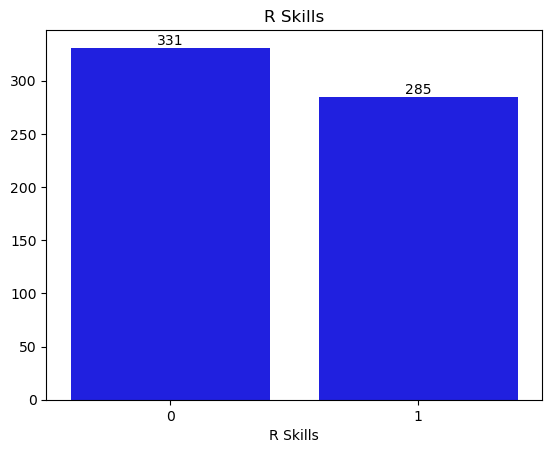

0: 49.84 %
1: 50.16 %


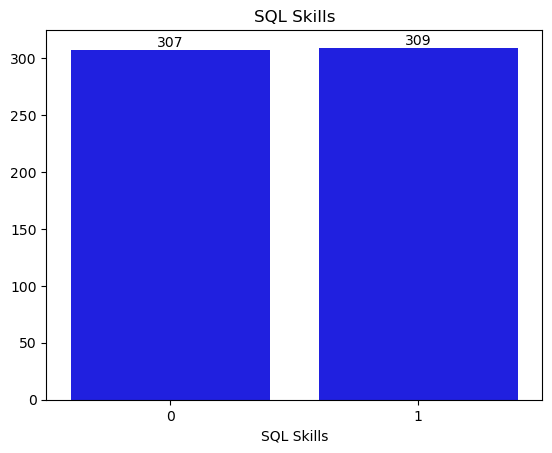

0: 32.14 %
1: 67.86 %


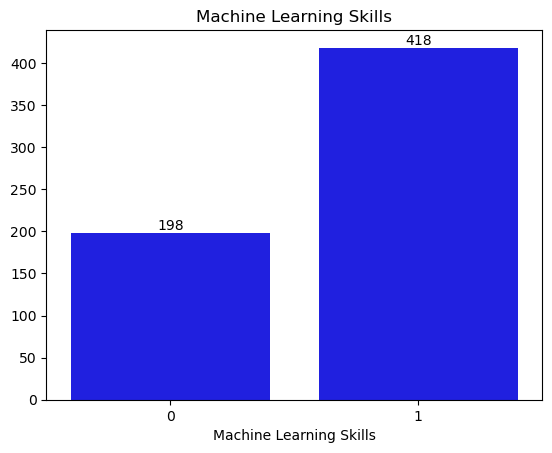

0: 43.99 %
1: 56.01 %


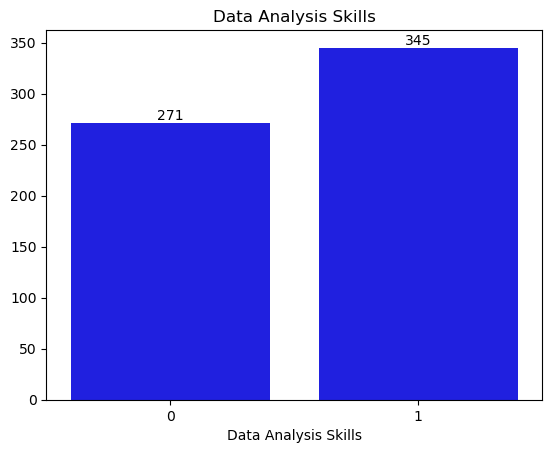

0: 75.49 %
1: 24.51 %


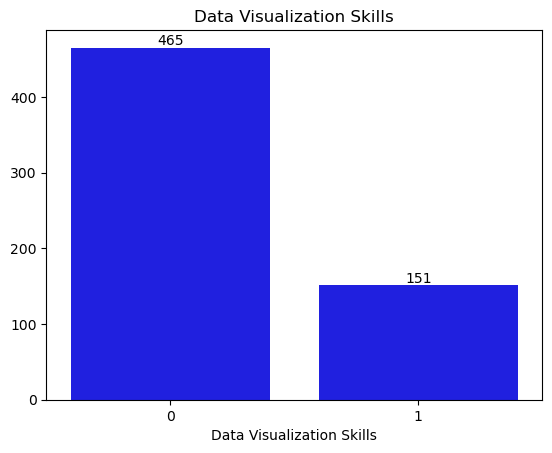

0: 73.7 %
1: 26.3 %


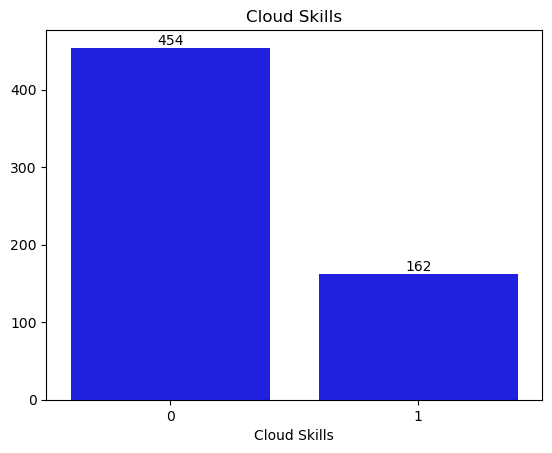

0: 45.13 %
1: 54.87 %


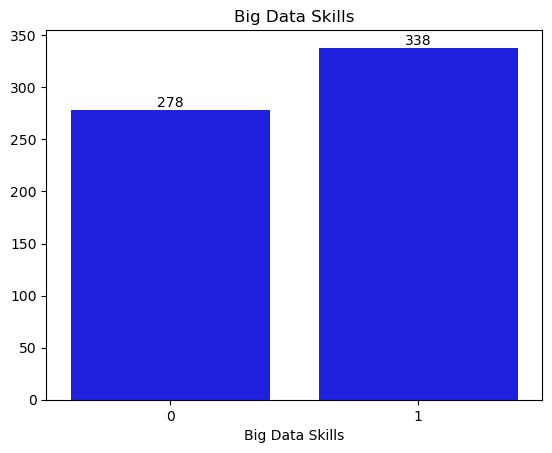

0: 85.55 %
1: 14.45 %


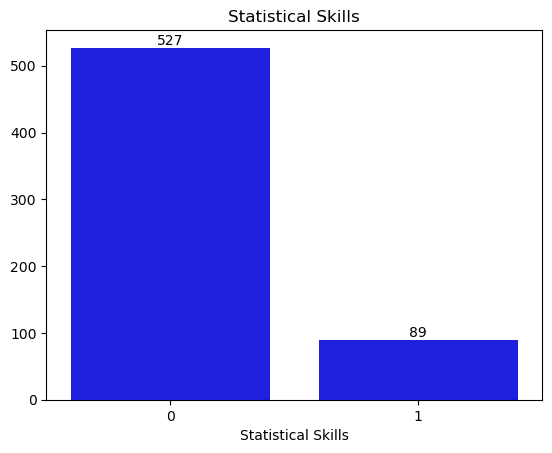

0: 36.85 %
1: 63.15 %


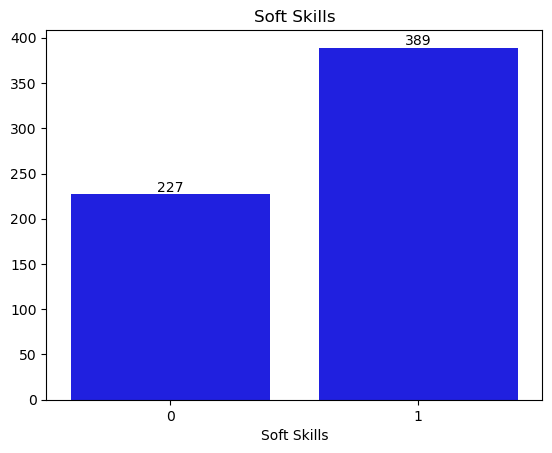

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for label in df_copy.columns[20:-1]:
    #print(df_copy[label].value_counts())
    counts = df_copy[label].value_counts().sort_index()
    
    # Crear gráfico de barras
    ax = sns.barplot(x=counts.index, y=counts.values, order=counts.index, color='blue')
    # Agregar etiquetas con valores encima de las barras
    for i, value in enumerate(counts.values):
        ax.text(i,value,str(value),ha='center',va='bottom',color="black")
        print(f"{i}: {round(value / 616 * 100, 2)} %")
    plt.title(label)
    plt.show()


Según las descripciones de trabajo, las tres habilidades más importantes para los data scientists son el uso de Python, el conocimiento en tecnologías de machine learning y las habilidades blandas. En menor proporción, se destacan las habilidades en R, SQL, big data y análisis de datos. Por último, se encuentran las habilidades relacionadas con la nube, estadísticas y visualización de datos.

### **12. Tarea: Analizar y visualizar la relación entre los ratings de los puestos de trabajo con el salario**

Se busca analizar la relación entre las calificaciones de los trabajos, proporcionados por los usuarios, y las estimaciones salariales mínimas, medias y máximas. Visualizaremos estas relaciones mediante gráficos de caja (`boxplot`), lo que permitirá observar la distribución salarial en función de los diferentes ratings.

#### **Proceso:**
1. Se utilizan gráficos de caja para visualizar la relación entre los ratings y las tres estimaciones salariales: mínima, media y máxima.
2. Se crea un gráfico de caja para cada una de las estimaciones salariales (`Min_Salary_Estimate`, `Mean_Salary_Estimate`, `Max_Salary_Estimate`), usando `Rating` como el eje x.
3. Cada gráfico está acompañado de un título que facilita la interpretación.
___


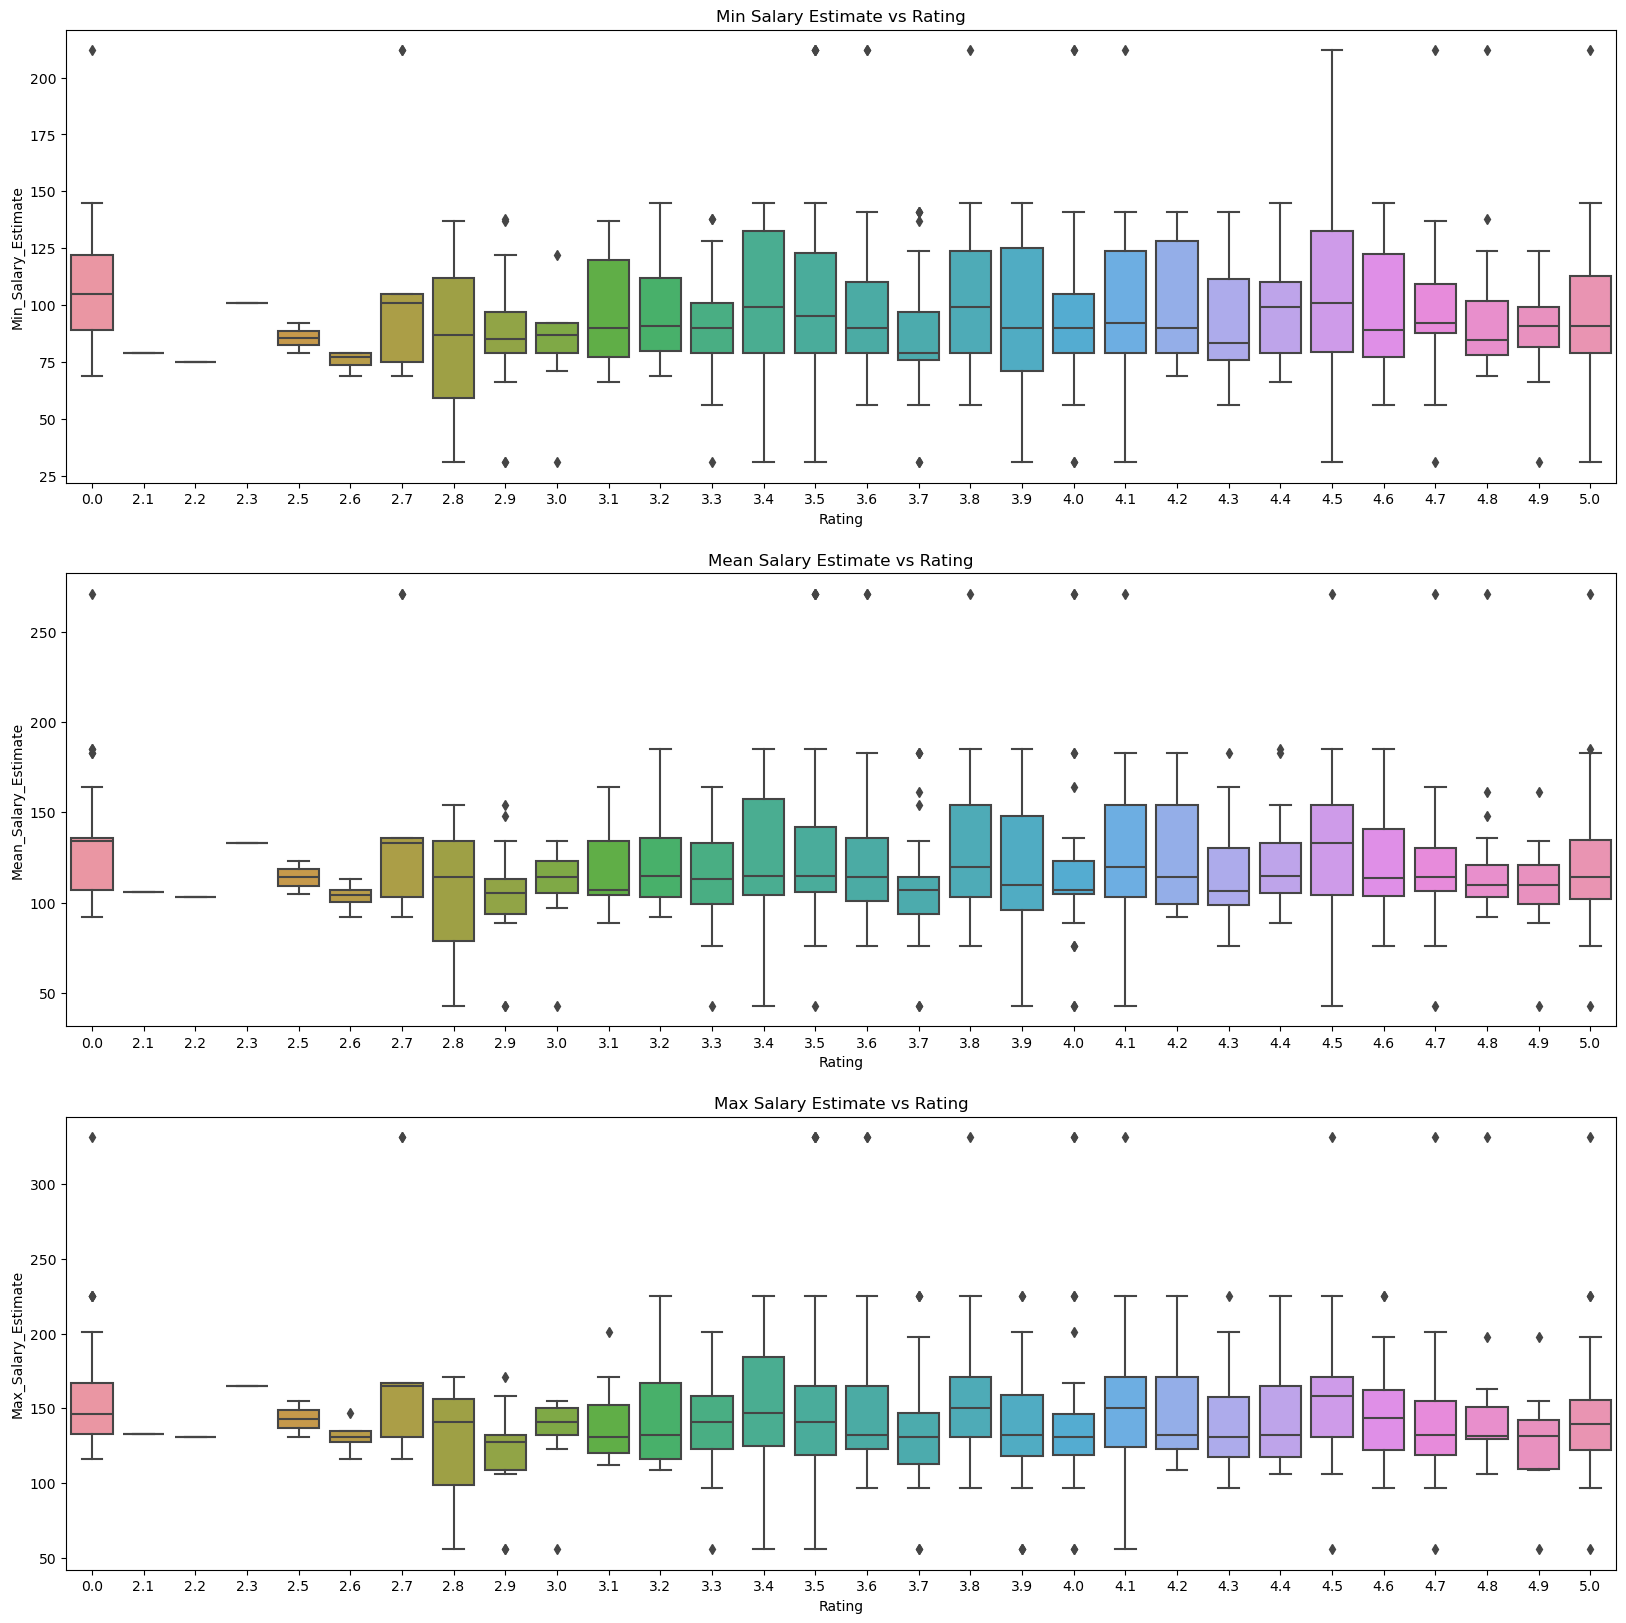

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(20, 20))

# Primer gráfico: Relación entre Rating y Min Salary Estimate
plt.subplot(3, 1, 1)
sns.boxplot(data=df_copy, x="Rating", y="Min_Salary_Estimate")
plt.title("Min Salary Estimate vs Rating")

# Segundo gráfico: Relación entre Rating y Mean Salary Estimate
plt.subplot(3, 1, 2)
sns.boxplot(data=df_copy, x="Rating", y="Mean_Salary_Estimate")
plt.title("Mean Salary Estimate vs Rating")

# Tercer gráfico: Relación entre Rating y Max Salary Estimate
plt.subplot(3, 1, 3)
sns.boxplot(data=df_copy, x="Rating", y="Max_Salary_Estimate")
plt.title("Max Salary Estimate vs Rating")

# Mostrar la gráfica
plt.show()

No se observa una relación clara entre el rating de la empresa y los salarios ofrecidos (mínimo, medio o máximo). Aunque algunas empresas con ratings bajos presentan una mayor variabilidad en los salarios y, en algunos casos, ofrecen salarios más altos que aquellas con ratings más altos, no existe una tendencia general que sugiera que un mayor rating esté asociado consistentemente con mejores salarios. Los salarios en empresas con ratings medios y altos tienden a ser más estables, pero sin un patrón definitivo de crecimiento a medida que aumenta el rating.